In [1]:
using FundamentalsNumericalComputation

┌ Info: verify download of index files...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\MatrixDepot.jl:117
┌ Info: creating database file
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:64
┌ Info: reading index files
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:82
┌ Info: downloading: https://sparse.tamu.edu/files/ss_index.mat
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\downloadsp.jl:90


┌ Info: downloading index file https://math.nist.gov/MatrixMarket/matrices.html
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\downloadmm.jl:60


┌ Info: adding metadata...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:68


┌ Info: adding svd data...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:70
┌ Info: writing database
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:75


┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\MatrixDepot.jl:119


# Chapter 2 - Linear systems of equations

My notes and selected exercises. 

This chapter is concerned with solving equations $\mathbf{A}\mathbf{x} = b$ for square matrix $\mathbf{A}$.  The motivating example is polynomial interpolation. Julia has built in tools for solving systems of equations, mainly the `A\b` syntax..


## Section 2.1

#### Exercise 2.1.4:
  Here are the official population figures for the state of Delaware, USA, every ten years from 1790 to 1900: 59096, 64273, 72674, 72749, 76748, 78085, 91532, 112216, 125015, 146608, 168493, 184735. For this problem, use $t=(year-1860)/10$ as the independent (time) variable.

(a) Using only the data from years 1860 to 1900, plot the interpolating polynomial over the same range of years. Add the original data points to your plot as well.

(b) You might assume that adding more data will make the interpolation better. But this is not always the case. Use all the data above to create an interpolating polynomial of degree 11, and then plot that polynomial over the range 1860 to 1900. In what way is this fit clearly inferior to the previous one? (This phenomenon is studied in Chapter 9.)

In [37]:
population = [59096, 64273, 72674, 72749, 76748, 78085, 91532, 112216, 125015, 146608, 168493, 184735]
years = ([1790:10:1900;] .-1860)/10;

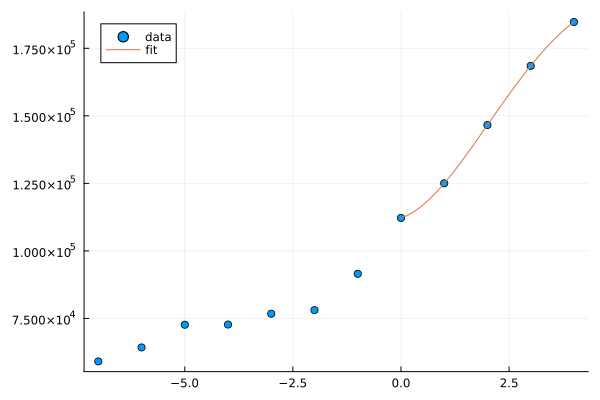

In [38]:
V = [ year^j for year in years[year .>= 0] ,j = 0:4   ]
c = V \ population[year .>= 0]
p = Polynomial(c)
scatter(years, population, label = "data")
tt = range(0, 4, length = 100)
yy = p.(tt)
plot!(tt, yy, label = "fit")

Now include all the data

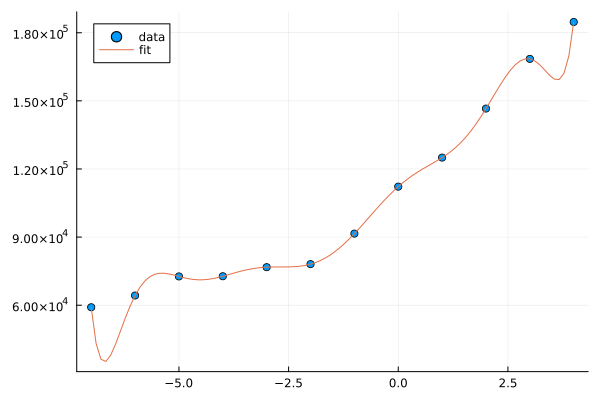

In [40]:
V = [ year^j for year in years ,j = 0:length(years)-1   ]
c = V \ population
p = Polynomial(c)
scatter(years, population, label = "data")
tt = range(-7, 4, length = 100)
yy = p.(tt)
plot!(tt, yy, label = "fit")

This is a case of overfitting:  The interpolation goes through all the points, but between points there are large excursions to get the line to go exactly through the (noisy) data.

## Section 2.2

Computing with matrices - some examples were given of working with Julia matrices.

## Section 2.3



The key observation is that solving these equations is trivial if $\mathbf{A}$ is upper or lower triangular, as then you can solve this directly through back or forward substitution. 


In [46]:
"""
    forwardsub(L,b)

Solve the lower triangular linear system with matrix `L` and
right-hand side vector `b`.
"""
function forwardsub(L,b)
    n = size(L,1)
    x = zeros(n)
    x[1] = b[1]/L[1,1]
    for i in 2:n
        s = sum( L[i,j]*x[j] for j in 1:i-1 )
        x[i] = ( b[i] - s ) / L[i,i]
    end
    return x
end

"""
    backsub(U,b)

Solve the upper triangular linear system with matrix `U` and
right-hand side vector `b`.
"""
function backsub(U,b)
    n = size(U,1)
    x = zeros(n)
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        s = sum( U[i,j]*x[j] for j in i+1:n )
        x[i] = ( b[i] - s ) / U[i,i]
    end
    return x
end

backsub

### Exercise 2.3.4

In [50]:
# a) 
U = [ 3 1 0 
      0 -1 -2
      0 0 3]
b = [1, 1, 6]

x = backsub(U, b)

U*x - b

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [51]:
U = [ 3 1 0 6
      0 -1 -2 7
      0 0 3 4
      0 0 0 6]
b = [4, 1, 1, 5]

U*backsub(U, b)- b

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0

#### Exericse 2.3.5 

This is a numerical approximation to a string with fixed ends and point masses distributed along the string.

The length is 1, and there are n-1  masses $m_i$ at  equally spaces positions $x_k = k/n$ , $k=1,...,n-1$  The vertical displacement caused by this is $q_k$. 
An approximate balance equation is:

$$
n\tau(q_k-q_{k-1}) + n\tau(q_k-q_{k+1}) = m_k g
$$

We can write this as a linear system $\mathbf{A} q = f$ where $q$ si the vector of displacements $q_k$ and $f$ is the vector of forces $m_k g$. $\mathbf{A}$ will be tridiagonal with $2 n\tau$ on the diagonal and $-n\tau$ on the off diagonals.

b ) Let $\tau$ = 10 N, $m_k = 0.1/n$ Find displacements when $n = 8$ and $n = 40$ and plot the results.

c) repeat for $m_k = k/5n^2$

In [121]:
function A_matrix(τ, n)
    A = zeros(n,n)
    for i in 1:n
        for j in 1:n
            if(i == j)
               A[i,j] = -2
            elseif(i == j+1 || i == j-1)
                A[i,j] = 1
            else 
                A[i,j] = 0
            end
        end
    end
    return A.*n*τ
end

# Constant
g = 9.81

# Compute displacement:
function displacement(τ, m, n)
    A = A_matrix(τ, n-1)
    f =m*g
    return [0. ; A\f; 0.]
end

displacement (generic function with 1 method)

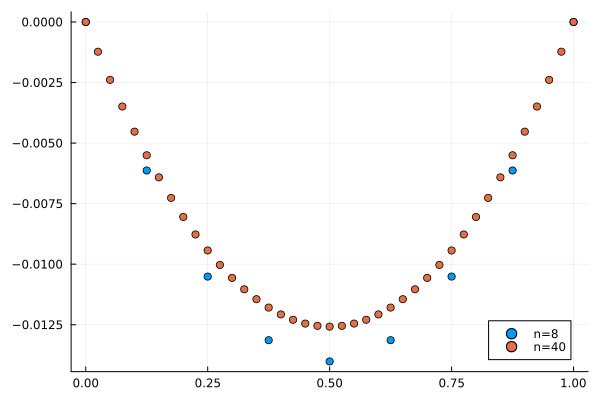

In [123]:
 # case n= 8
n = 8
q_8 = displacement(10, ones(n-1)*0.1/n, n)
# case n= 40
n = 40
q_40 = displacement(10, ones(n-1)*0.1/n, n)
scatter((0.:8)/8, q_8, label = "n=8")
scatter!((0.:40)/40, q_40, label = "n=40")

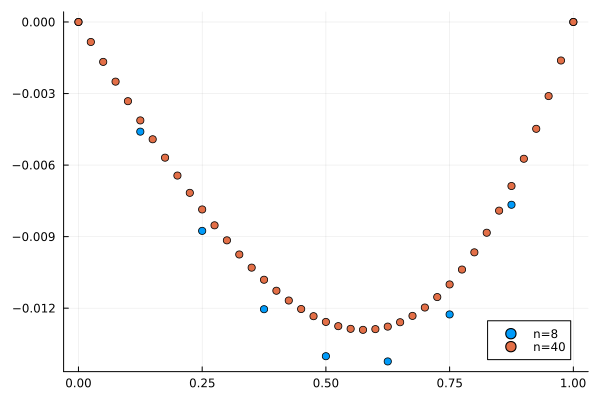

In [124]:
 
 # case n= 8
 n = 8
 m = [k/(5*n^2) for k in 1:(n-1)]
 q_8 = displacement(10,m, n)
 # case n= 40
 n = 40
 m = [k/(5*n^2) for k in 1:(n-1)]
 q_40 = displacement(10,m, n)
 scatter((0.:8)/8, q_8, label = "n=8")
 scatter!((0.:40)/40, q_40, label = "n=40")

## Section 2.4
 
 If $\mathbf{A}$ is not triangular, then you can use LU decomposition to transform A into a product of a lower and upper triangular matrix.